# Data Import and Cleaning 

#### Datasets from here: 
- https://www.census.gov/programs-surveys/sipp/data/datasets/2008-panel/wave-1.html
- https://www.census.gov/programs-surveys/sipp/data/datasets/2008-panel/wave-2.html
#### Column definition from here: 
- https://www2.census.gov/programs-surveys/sipp/data/datasets/2008/l08puw1.sas
- https://www2.census.gov/programs-surveys/sipp/data/datasets/2008/p08putm1.sas

In [2]:
import numpy as np
import pandas as pd

## Import SIPP data

In [1]:
# sas input statement needs to be cleaned by hand: remove all whitespaces and $-signs e.g. replace ' -' with '-'
# columns that should be kept, need to be defined by hand as well
def import_sipp_data(sas_input_statement, dat_file, columns_keep):
    input_dict = np.loadtxt(sas_input_statement, dtype = str)
    column_lst = input_dict[:, 0].tolist()
    
    colspecs = []
    for string in input_dict[:, 1]:
        tpl_temp = tuple(map(int, string.split('-')))
        tpl_temp = (tpl_temp[0]-1, tpl_temp[1]) # second number should also be corrected?
        colspecs.append(tpl_temp)
    df_raw = pd.read_fwf(dat_file, names=column_lst, colspecs=colspecs)

    df = df_raw[columns_keep]
    del df_raw
    return df

In [266]:
# columns core dataset
clmn_join = ['SSUID', 'SPANEL', 'SWAVE', 'EPPPNUM']

clmn_join_unused = [ 'TFIPSST', 'EOUTCOME', 'SHHADID', 'RFID', 'RFID2', 'EENTAID', 'EPOPSTAT', 'EPPINTVW', 'ESEX', 'ERACE', 'EORIGIN', 'WPFINWGT', 'ERRP', 
                    'EMS', 'EPNMOM', 'EPNDAD', 'EPNGUARD', 'EPNSPOUS', 'RDESGPNT', 'TAGE', 'EEDUCATE']

clmn_general = ['SREFMON', 'EHREFPER', 'RHCALMN', 'RHCALYR', 'TMOVRFLG', 'EHHNUMPP', 'EFSPOUSE', 'RFNKIDS', 'EBORNUS', 'ECITIZEN', 'RENROLL', 'EFKIND', 'RHTYPE']

# make hist for all income categories and combine the small ones into a new 'other' or substract all interesting income streams from total and take the residual.
clmn_income = ['TFEARN', 'TFTOTINC', 'TPEARN', 'TPTOTINC', 'THTRNINC', 'THOTHINC', 'ETENURE', 'THPNDIST', 'THSOCSEC', 'THVETS', 'THLUMPSM', 'THAFDC', 
                'EAST1C', 'THPRPINC', 'TINTINC', 'TDIVINC', 'EAST3B', 'EAST3C', 'EAST3D', 'EAST3E', 'EAST4A' ]

clmn_labor = ['EPAYHR1', 'EPAYHR2', 'TPYRATE1', 'TPYRATE2', 'EJBHRS1', 'EJBHRS2', 'EUNION1', 'EUNION2', 'TMLMSUM', 'EDISABL', 'EDISPREV', 
                'EAWOP', 'EABRE', 'ERSNOWRK', 'EPTRESN', 'EBUSCNTR', 'EJOBCNTR', 'RMWKSAB', 'EPDJBTHN', 'ELKWRK', 'ELAYOFF', 'EHRSALL', 'EMOONLIT', 'RMHRSWK', 'EPTWRK', 
                'RMESR', 'RMWKWJB', 'RWKSPERM', 'EBNO1', 'EBNO2']

columns_core = clmn_join + clmn_join_unused + clmn_general + clmn_income + clmn_labor
print('length core columns: ', len(columns_core))

# columns topical dataset
clmn_join

clmn_rebate = ['EREBATE', 'ERBAMTH', 'ERBATAMT', 'ERBATTYP', 'EREBATOC']

columns_topical = clmn_join + clmn_rebate
print('length topical columns: ', len(columns_topical))

# potential columns to add: TMTHRNT (total rent), RHCHANGE(change in HH composition), RFCHANGE(change in family composition)

length core columns:  88
length topical columns:  9


In [5]:
w2_core = import_sipp_data('input_core.txt', '/Users/maxweber/Desktop/DataMasterThesis/l08puw2.dat', columns_core)
print('w2 core imported')
w2_core.to_csv('/Users/maxweber/Desktop/DataMasterThesis/core_w2.csv') 
print('w2 core exported to csv')

w1_core = import_sipp_data('input_core.txt', '/Users/maxweber/Desktop/DataMasterThesis/l08puw1.dat', columns_core)
print('w1 core imported')
w1_core.to_csv('/Users/maxweber/Desktop/DataMasterThesis/core_w1.csv') 
print('w1 core exported to csv')

w1_topical = import_sipp_data('input_topical_w1.txt', '/Users/maxweber/Desktop/DataMasterThesis/p08putm1.dat', columns_topical)
print('w1 topical imported')
w1_topical.to_csv('/Users/maxweber/Desktop/DataMasterThesis/topical_w1.csv') 
print('w1 topical exported to csv')

w2_topical = import_sipp_data('input_topical_w2.txt', '/Users/maxweber/Desktop/DataMasterThesis/p08putm2.dat', columns_topical)
print('w2 topical imported')
w2_topical.to_csv('/Users/maxweber/Desktop/DataMasterThesis/topical_w2.csv') 
print('w2 topical exported to csv')

[(0, 5), (5, 17), (17, 21), (21, 23), (23, 24), (24, 25), (25, 27), (27, 31), (31, 34), (34, 37), (37, 38), (38, 41), (41, 43), (43, 45), (45, 48), (48, 50), (50, 52), (52, 54), (54, 58), (58, 61), (61, 62), (62, 72), (72, 73), (73, 74), (74, 76), (76, 77), (77, 78), (78, 80), (80, 81), (81, 83), (83, 84), (84, 90), (90, 91), (91, 93), (93, 94), (94, 96), (96, 97), (97, 99), (99, 100), (100, 102), (102, 104), (104, 106), (106, 107), (107, 112), (112, 113), (113, 115), (115, 116), (116, 118), (118, 120), (120, 121), (121, 123), (123, 124), (124, 126), (126, 127), (127, 129), (129, 131), (131, 132), (132, 134), (134, 135), (135, 136), (136, 143), (143, 151), (151, 158), (158, 165), (165, 173), (173, 175), (175, 177), (177, 179), (179, 184), (184, 191), (191, 199), (199, 205), (205, 211), (211, 217), (217, 223), (223, 229), (229, 235), (235, 241), (241, 244), (244, 247), (247, 249), (249, 253), (253, 257), (257, 259), (259, 260), (260, 262), (262, 264), (264, 266), (266, 268), (268, 270),

In [283]:
w1_core = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/core_w1.csv')
w2_core = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/core_w2.csv')
w1_topical = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/topical_w1.csv')
w2_topical = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/topical_w2.csv')

In [284]:
print(w1_core.shape)
print(w1_topical.shape)
w1_full = w1_core.merge(w1_topical[clmn_join+clmn_rebate], how = 'left', on = clmn_join)
w1_full.shape

print(w2_core.shape)
print(w2_topical.shape)
w2_full = w2_core.merge(w2_topical[clmn_join+clmn_rebate], how = 'left', on = clmn_join)
w2_full.shape

df = pd.concat([w1_full, w2_full])
df.drop('Unnamed: 0', inplace = True, axis=1)

df.to_csv('/Users/maxweber/Desktop/DataMasterThesis/full_sipp.csv')
print(df.shape)
del [w1_core, w2_core, w1_topical, w2_topical]

df.head()

(421911, 88)
(105663, 31)
(392702, 88)
(98504, 31)
(814613, 92)


,SSUID,SPANEL,SWAVE,TFIPSST,EOUTCOME,SHHADID,RFID,RFID2,EENTAID,EPPPNUM,...,RMESR,RMWKWJB,RWKSPERM,EBNO1,EBNO2,EREBATE,ERBAMTH,ERBATAMT,ERBATTYP,EREBATOC
0,19128000276,2008,1,12,201,11,1,1,11,101,...,8,0,4,-1,-1,2.0,-1.0,0.0,-1.0,-1.0
1,19128000276,2008,1,12,201,11,2,2,11,101,...,8,0,5,-1,-1,2.0,-1.0,0.0,-1.0,-1.0
2,19128000276,2008,1,12,201,11,3,3,11,101,...,8,0,4,-1,-1,2.0,-1.0,0.0,-1.0,-1.0
3,19128000276,2008,1,12,201,11,4,4,11,101,...,7,0,4,-1,-1,2.0,-1.0,0.0,-1.0,-1.0
4,19128000276,2008,1,12,201,11,1,1,11,102,...,8,0,4,-1,-1,2.0,-1.0,0.0,-1.0,-1.0


In [1027]:
df = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/full_sipp.csv')
df.drop('Unnamed: 0', inplace = True, axis=1)
df.shape

(814613, 92)

## Data Cleaning and Feature Engineering

In [1028]:
df['pp'] = df.groupby(['SSUID','EPPPNUM']).ngroup()
df.set_index('pp', inplace = True)
print('unique index: ',len(df.index.unique())) #95577 unique
print('unique HH: ',len(df['SSUID'].unique()))
pp_count = df.groupby(['pp'], as_index=False).size() # columns: pp and size
pp_count

df = df.merge(pp_count, how = 'outer', on = 'pp')
df = df[df['size']== 8]
print('unique HH: ',len(df['SSUID'].unique()))
df.drop('size', axis=1, inplace = True)

df.shape # 764.616 from 814.613 before

unique index:  108280
unique HH:  42030
unique HH:  38569


(764616, 93)

unique index:  587768
unique HH:  26238


(587768, 95)

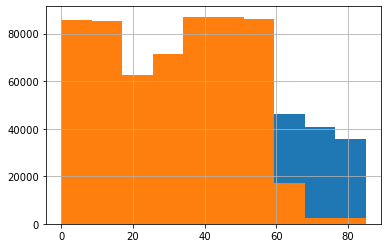

In [1029]:
#Powell: I require the head of the household to be between 25 and 60 years old
# EHREFPER = EPPPNUM and TAGE => 25 and TAGE <= 60 (this can be optimized by looking at first or last month of observed timeframe)
df['TAGE'].describe()
min_tage = df.groupby(df.index)['TAGE'].min().rename('min_tage')
max_tage = df.groupby(df.index)['TAGE'].max().rename('max_tage')

df = df.merge(min_tage, how = 'left', left_index = True, right_index = True)
df = df.merge(max_tage, how = 'left', left_index = True, right_index = True)

ssuids_age = df[(df['EHREFPER'] == df['EPPPNUM']) & (df['min_tage']>= 25)  & (df['max_tage'] <= 60)]['SSUID'].unique()

df[~df['SSUID'].isin(ssuids_age)]['TAGE'].hist()
df[df['SSUID'].isin(ssuids_age)]['TAGE'].hist()
df = df[df['SSUID'].isin(ssuids_age)]
# seems reasonable. next step is to aggregate to houshold level to further reduce #of HH

print('unique index: ',len(df.index.unique()))
print('unique HH: ',len(df['SSUID'].unique()))
df.shape

In [1030]:
# create the total month variable with year and month
def get_total_month(year,month):
    if year == 2009:
        return month+12
    else:
        return month
        
df['month_total'] = df.apply(lambda x: get_total_month(x['RHCALYR'],x['RHCALMN']),axis=1)

In [1032]:
# correct the rebated if EREBATE = 2 -> EREBATE = 0; if EREBATE = -1 -> EREBATE = np.NaN 
print(df[~df['EREBATE'].isnull()]['EREBATE'].unique()) 
df['erebate'] = df['EREBATE'].replace({2 : 0, -1 : np.NaN})

df['erbamth'] = df['ERBAMTH'].replace(-1, np.NaN)
df['erebatoc'] = df['EREBATOC'].replace(-1, np.NaN)
df['erbattyp'] = df['ERBATTYP'].replace({2 : 0, -1 : np.NaN})

[ 2. -1.  1.]


array([[<AxesSubplot:title={'center':'erebate'}>,
        <AxesSubplot:title={'center':'erbamth'}>],
       [<AxesSubplot:title={'center':'erbattyp'}>,
        <AxesSubplot:title={'center':'erebatoc'}>]], dtype=object)

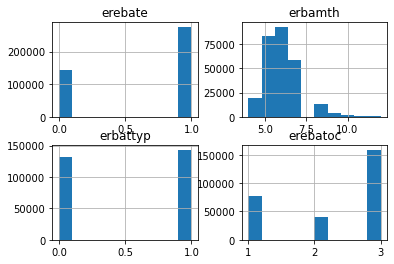

In [1033]:
df[['erebate','erbamth', 'erbattyp', 'erebatoc']].hist()

In [1034]:
df['erebate'].describe()
# so far not the number from Powell. Different if aggregeated to HH?

count    418076.000000
mean          0.659383
std           0.473917
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: erebate, dtype: float64

In [1035]:
# define lag_time as time relative to the month of rebate. Use this to define lag-dummies used in the regression.
df['lag_time'] =  df['month_total'] - df['erbamth']

# use on df without NaN in lag_time period
def get_pivoted_feature(df, col_name):
    rslt_df = df.pivot(columns = 'lag_time', values = col_name)
    clm_lst = []
    for i in range(len(rslt_df.columns)):
        clm_lst.append(col_name +  '_' + string(str(rslt_df.columns[i])[0:-2])) # vorher: str(rslt_df.columns[i])
    rslt_df.columns = clm_lst
    return rslt_df

In [1094]:
# create dummies for the rebate dummy and the month of rebate
pivoted = get_pivoted_feature(df[df['lag_time'].notnull()], 'erebate')
df = pivoted.merge(df, how = 'outer', left_index = True, right_index=True)
print(df.shape)

df[pivoted.columns] = df[pivoted.columns].replace(np.NaN,0)
df[df['erebate'].notnull()][pivoted.columns] # replaced the nan with 0.0

(587768, 155)


,erebate_-6.0,erebate_-5.0,erebate_-4.0,erebate_-3.0,erebate_-2.0,erebate_-1.0,erebate_0.0,erebate_1.0,erebate_2.0,erebate_3.0,erebate_4.0,erebate_5.0,erebate_6.0,erebate_7.0,erebate_8.0,erebate_9.0,erebate_10.0,erebate_11.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1095]:
df[df['erebate']==1][['SSUID','EPPPNUM']]
df[df['SSUID']==19128038046][pivoted.columns]

,erebate_-6.0,erebate_-5.0,erebate_-4.0,erebate_-3.0,erebate_-2.0,erebate_-1.0,erebate_0.0,erebate_1.0,erebate_2.0,erebate_3.0,erebate_4.0,erebate_5.0,erebate_6.0,erebate_7.0,erebate_8.0,erebate_9.0,erebate_10.0,erebate_11.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Aggregate to houshold level (SSUID)
modified/aggregated variables in lower caps

In [1096]:
pivoted.columns

Index(['erebate_-6.0', 'erebate_-5.0', 'erebate_-4.0', 'erebate_-3.0',
       'erebate_-2.0', 'erebate_-1.0', 'erebate_0.0', 'erebate_1.0',
       'erebate_2.0', 'erebate_3.0', 'erebate_4.0', 'erebate_5.0',
       'erebate_6.0', 'erebate_7.0', 'erebate_8.0', 'erebate_9.0',
       'erebate_10.0', 'erebate_11.0'],
      dtype='object')

In [1107]:
houshold = df.groupby(['SSUID', 'month_total'])[['SSUID', 'TFEARN', 'ERBATAMT','TFTOTINC', 'month_total', 'erbamth','erebate_-6.0', 'erebate_-5.0', 'erebate_-4.0', 'erebate_-3.0' 
                                                ,'erebate_-2.0', 'erebate_-1.0', 'erebate_0.0', 'erebate_1.0','erebate_2.0', 'erebate_3.0', 'erebate_4.0', 'erebate_5.0', 
                                                'erebate_6.0', 'erebate_7.0', 'erebate_8.0', 'erebate_9.0', 'erebate_10.0', 'erebate_11.0']].agg({'month_total': 'first',
                                                                                                                                                'TFEARN': 'first',
                                                                                                                                                'erbamth': 'first',
                                                                                                                                                'TFTOTINC': 'first',
                                                                                                                                                'ERBATAMT': 'first',
                                                                                                                                                'erebate_-6.0': 'first',
                                                                                                                                                'erebate_-5.0': 'first',
                                                                                                                                                'erebate_-4.0': 'first',
                                                                                                                                                'erebate_-3.0': 'first',
                                                                                                                                                'erebate_-2.0': 'first',
                                                                                                                                                'erebate_-1.0': 'first', 
                                                                                                                                                'erebate_0.0': 'first',
                                                                                                                                                'erebate_1.0': 'first',
                                                                                                                                                'erebate_2.0': 'first', 
                                                                                                                                                'erebate_3.0': 'first', 
                                                                                                                                                'erebate_4.0': 'first',
                                                                                                                                                'erebate_5.0': 'first',
                                                                                                                                                'erebate_6.0': 'first',
                                                                                                                                                'erebate_7.0': 'first',
                                                                                                                                                'erebate_8.0': 'first',
                                                                                                                                                'erebate_9.0': 'first',
                                                                                                                                                'erebate_10.0': 'first',
                                                                                                                                                'erebate_11.0': 'first'})
houshold[['ERBATAMT', 'TFEARN']].describe()

,ERBATAMT,TFEARN
count,209904.000000,209904.000000
mean,407.518027,5153.436137
std,327.563129,5758.693401
min,0.000000,-46667.000000
25%,0.000000,1577.000000
50%,450.000000,3810.000000
75%,600.000000,7000.000000
max,2250.000000,98083.000000


In [1109]:
houshold.loc[955958398688]

,month_total,TFEARN,erbamth,TFTOTINC,ERBATAMT,erebate_-6.0,erebate_-5.0,erebate_-4.0,erebate_-3.0,erebate_-2.0,...,erebate_2.0,erebate_3.0,erebate_4.0,erebate_5.0,erebate_6.0,erebate_7.0,erebate_8.0,erebate_9.0,erebate_10.0,erebate_11.0
month_total,,,,,,,,,,,,,,,,,,,,,
7.0,7.0,10000,9.0,10104,1000.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,8.0,10000,9.0,10104,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,9.0,10000,9.0,10104,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,10.0,10000,9.0,10104,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,11.0,10000,8.0,10333,900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,12.0,10000,8.0,10333,900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13.0,13.0,10000,8.0,10333,900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14.0,14.0,10000,8.0,10333,900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Data Description

In [1110]:
houshold.head()

month_total  TFEARN  erbamth  TFTOTINC  ERBATAMT  \
SSUID       month_total                                                     
19128000276 6.0                  6.0       0      NaN      1099       0.0   
            7.0                  7.0       0      NaN      1099       0.0   
            8.0                  8.0       0      NaN      1099       0.0   
            9.0                  9.0       0      NaN      1099       0.0   
            10.0                10.0       0      NaN       381       0.0   

                         erebate_-6.0  erebate_-5.0  erebate_-4.0  \
SSUID       month_total                                             
19128000276 6.0                   0.0           0.0           0.0   
            7.0                   0.0           0.0           0.0   
            8.0                   0.0           0.0           0.0   
            9.0                   0.0           0.0           0.0   
            10.0                  0.0           0.0           0.0   

                         erebate_-3.0  erebate_-2.0  ...  erebate_2.0  \
SSUID       month_total                              ...                
19128000276 6.0                   0.0           0.0  ...          0.0   
            7.0                   0.0           0.0  ...          0.0   
            8.0                   0.0           0.0  ...          0.0   
            9.0                   0.0           0.0  ...          0.0   
            10.0                  0.0           0.0  ...          0.0   

                         erebate_3.0  erebate_4.0  erebate_5.0  erebate_6.0  \
SSUID       month_total                                                       
19128000276 6.0                  0.0          0.0          0.0          0.0   
            7.0                  0.0          0.0          0.0          0.0   
            8.0                  0.0          0.0          0.0          0.0   
            9.0                  0.0          0.0          0.0          0.0   
            10.0                 0.0          0.0          0.0          0.0   

                         erebate_7.0  erebate_8.0  erebate_9.0  erebate_10.0  \
SSUID       month_total                                                        
19128000276 6.0                  0.0          0.0          0.0           0.0   
            7.0                  0.0          0.0          0.0           0.0   
            8.0                  0.0          0.0          0.0           0.0   
            9.0                  0.0          0.0          0.0           0.0   
            10.0                 0.0          0.0          0.0           0.0   

                         erebate_11.0  
SSUID       month_total                
19128000276 6.0                   0.0  
            7.0                   0.0  
            8.0                   0.0  
            9.0                   0.0  
            10.0                  0.0  

[5 rows x 23 columns]

# Analysis base modification
- with & without groupings to make sure the definition is correct
- with my dataset and with POWELL dataset
- with time and entity effect


In [325]:
%pip install linearmodels

     |████████████████████████████████| 1.5 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 14.3 MB/s eta 0:00:01
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

formulaic 0.3.4 requires scipy>=1.6, but you'll have scipy 1.5.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1101]:
# Fixed effects regression:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [1111]:
# with dummy * amount:
exog_vars = houshold[['erebate_-2.0', 'erebate_-1.0', 'erebate_0.0', 'erebate_1.0','erebate_2.0', 'erebate_3.0', 'erebate_4.0', 'erebate_5.0', 'erebate_6.0', 
                      'erebate_7.0', 'erebate_8.0', 'erebate_9.0', 'erebate_10.0', 'erebate_11.0']].multiply(houshold['ERBATAMT'], axis = 'index')
exog_vars['month_total'] = pd.Categorical(houshold['month_total'])
exog = sm.add_constant(exog_vars)

model = PanelOLS(houshold['TFEARN'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)

model.fit()

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-1111-ea20ed482049>:9: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

month_total.6.0, month_total.7.0, month_total.8.0, month_total.9.0, month_total.10.0, month_total.11.0, month_total.12.0, month_total.13.0, month_total.14.0, month_total.15.0

  model.fit()


Dep. Variable:,TFEARN,R-squared:,5.156e-05
Estimator:,PanelOLS,R-squared (Between):,0.0001
No. Observations:,209904,R-squared (Within):,2.97e-05
Date:,"Sun, May 29 2022",R-squared (Overall):,9.5e-05
Time:,10:10:23,Log-likelihood,-1.895e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.6763
Entities:,26238,P-value,0.7999
Avg Obs:,8.0000,Distribution:,"F(14,183642)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.6763


In [1112]:
# with dummy only:
exog_vars = houshold[['erebate_-2.0', 'erebate_-1.0', 'erebate_0.0', 'erebate_1.0','erebate_2.0', 'erebate_3.0', 'erebate_4.0', 'erebate_5.0', 'erebate_6.0', 
                      'erebate_7.0', 'erebate_8.0', 'erebate_9.0', 'erebate_10.0', 'erebate_11.0']]
exog_vars['month_total'] = pd.Categorical(houshold['month_total'])
exog = sm.add_constant(exog_vars)

model = PanelOLS(houshold['TFEARN'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)

model.fit()

<ipython-input-1112-2c88ab2934f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exog_vars['month_total'] = pd.Categorical(houshold['month_total'])
<ipython-input-1112-2c88ab2934f9>:9: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

month_total.6.0, month_total.7.0, month_total.8.0, month_total.9.0, month_total.10.0, month_total.11.0, month_total.12.0, month_total.13.0, month_total.14.0, month_total.15.0

  model.fit()


Dep. Variable:,TFEARN,R-squared:,0.0001
Estimator:,PanelOLS,R-squared (Between):,0.0004
No. Observations:,209904,R-squared (Within):,-0.0001
Date:,"Sun, May 29 2022",R-squared (Overall):,0.0003
Time:,10:10:29,Log-likelihood,-1.895e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.4578
Entities:,26238,P-value,0.1178
Avg Obs:,8.0000,Distribution:,"F(14,183642)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,1.4578


In [1253]:
# next step: estimation with grouping:
totinc_dict = {
    1: range(0,2499),
    2: range(2500,5999),
    3: range(5000,12499),
    4: range(12500,99999)
}

reb_dummies_lst = ['erebate_-1.0', 'erebate_0.0', 'erebate_1.0','erebate_2.0', 'erebate_3.0', 'erebate_4.0']
totinc_dict.keys()

dict_keys([1, 2, 3, 4])

In [1267]:
def get_grouping(df_column, group_dict, reb_dummies_df):
    # get flag indicating the group with the dictionary-mapping:
    new_col = df_column.apply(lambda x: next((k for k, v in group_dict.items() if x in v), 0))
    new_col = new_col.rename(new_col.name + '_flag')
    new_cols = pd.get_dummies(new_col) # get dummies from group flag

   # create interaction dummies (group-dummy * rebatelag_dummy) iterating over each group_id and concatenating in the end:
    df_group_dummies = pd.DataFrame(df_column)
    group_lst = group_dict.keys()
    for group_id in group_lst:
        dummies_group = reb_dummies_df.multiply(new_cols[group_id], axis = 'index')
        
        new_dummy_names = []
        for name in dummies_group.columns:
            new_dummy_names.append(name + '-j' + str(group_id))
        dummies_group.columns = new_dummy_names
        df_group_dummies = df_group_dummies.merge(dummies_group,left_index= True, right_index=True)
        #df_group_dummies.replace(np.NaN, 0, inplace = True)
    return df_group_dummies


get_grouping(houshold['TFTOTINC'], totinc_dict, houshold[reb_dummies_lst])

TFTOTINC  erebate_-1.0-j1  erebate_0.0-j1  \
SSUID        month_total                                              
19128000276  6.0              1099              0.0             0.0   
             7.0              1099              0.0             0.0   
             8.0              1099              0.0             0.0   
             9.0              1099              0.0             0.0   
             10.0              381              0.0             0.0   
...                            ...              ...             ...   
955958398688 10.0            10104              0.0             0.0   
             11.0            10333              0.0             0.0   
             12.0            10333              0.0             0.0   
             13.0            10333              0.0             0.0   
             14.0            10333              0.0             0.0   

                          erebate_1.0-j1  erebate_2.0-j1  erebate_3.0-j1  \
SSUID        month_total                                                   
19128000276  6.0                     0.0             0.0             0.0   
             7.0                     0.0             0.0             0.0   
             8.0                     0.0             0.0             0.0   
             9.0                     0.0             0.0             0.0   
             10.0                    0.0             0.0             0.0   
...                                  ...             ...             ...   
955958398688 10.0                    0.0             0.0             0.0   
             11.0                    0.0             0.0             0.0   
             12.0                    0.0             0.0             0.0   
             13.0                    0.0             0.0             0.0   
             14.0                    0.0             0.0             0.0   

                          erebate_4.0-j1  erebate_-1.0-j2  erebate_0.0-j2  \
SSUID        month_total                                                    
19128000276  6.0                     0.0              0.0             0.0   
             7.0                     0.0              0.0             0.0   
             8.0                     0.0              0.0             0.0   
             9.0                     0.0              0.0             0.0   
             10.0                    0.0              0.0             0.0   
...                                  ...              ...             ...   
955958398688 10.0                    0.0              0.0             0.0   
             11.0                    0.0              0.0             0.0   
             12.0                    0.0              0.0             0.0   
             13.0                    0.0              0.0             0.0   
             14.0                    0.0              0.0             0.0   

                          erebate_1.0-j2  ...  erebate_1.0-j3  erebate_2.0-j3  \
SSUID        month_total                  ...                                   
19128000276  6.0                     0.0  ...             0.0             0.0   
             7.0                     0.0  ...             0.0             0.0   
             8.0                     0.0  ...             0.0             0.0   
             9.0                     0.0  ...             0.0             0.0   
             10.0                    0.0  ...             0.0             0.0   
...                                  ...  ...             ...             ...   
955958398688 10.0                    0.0  ...             1.0             0.0   
             11.0                    0.0  ...             0.0             0.0   
             12.0                    0.0  ...             0.0             0.0   
             13.0                    0.0  ...             0.0             0.0   
             14.0                    0.0  ...             0.0             0.0   

                          erebate_3.0-j3  erebate_4.0-j3 

In [1269]:
test_group_dummies = get_grouping(houshold['TFTOTINC'], totinc_dict, houshold[reb_dummies_lst])

print(test_group_dummies.shape)
print(test_group_dummies['erebate_3.0-j3'].sum())
reb_interaction_dummies = test_group_dummies.columns
reb_interaction_dummies

(209904, 25)
5534.0


Index(['TFTOTINC', 'erebate_-1.0-j1', 'erebate_0.0-j1', 'erebate_1.0-j1',
       'erebate_2.0-j1', 'erebate_3.0-j1', 'erebate_4.0-j1', 'erebate_-1.0-j2',
       'erebate_0.0-j2', 'erebate_1.0-j2', 'erebate_2.0-j2', 'erebate_3.0-j2',
       'erebate_4.0-j2', 'erebate_-1.0-j3', 'erebate_0.0-j3', 'erebate_1.0-j3',
       'erebate_2.0-j3', 'erebate_3.0-j3', 'erebate_4.0-j3', 'erebate_-1.0-j4',
       'erebate_0.0-j4', 'erebate_1.0-j4', 'erebate_2.0-j4', 'erebate_3.0-j4',
       'erebate_4.0-j4'],
      dtype='object')

In [1273]:
df_w_group_interaction = test_group_dummies.merge(houshold[['TFEARN', 'ERBATAMT']], left_index=True, right_index=True)
df_w_group_interaction['month_total'] = pd.Categorical(houshold['month_total'])
df_w_group_interaction

TFTOTINC  erebate_-1.0-j1  erebate_0.0-j1  \
SSUID        month_total                                              
19128000276  6.0              1099              0.0             0.0   
             7.0              1099              0.0             0.0   
             8.0              1099              0.0             0.0   
             9.0              1099              0.0             0.0   
             10.0              381              0.0             0.0   
...                            ...              ...             ...   
955958398688 10.0            10104              0.0             0.0   
             11.0            10333              0.0             0.0   
             12.0            10333              0.0             0.0   
             13.0            10333              0.0             0.0   
             14.0            10333              0.0             0.0   

                          erebate_1.0-j1  erebate_2.0-j1  erebate_3.0-j1  \
SSUID        month_total                                                   
19128000276  6.0                     0.0             0.0             0.0   
             7.0                     0.0             0.0             0.0   
             8.0                     0.0             0.0             0.0   
             9.0                     0.0             0.0             0.0   
             10.0                    0.0             0.0             0.0   
...                                  ...             ...             ...   
955958398688 10.0                    0.0             0.0             0.0   
             11.0                    0.0             0.0             0.0   
             12.0                    0.0             0.0             0.0   
             13.0                    0.0             0.0             0.0   
             14.0                    0.0             0.0             0.0   

                          erebate_4.0-j1  erebate_-1.0-j2  erebate_0.0-j2  \
SSUID        month_total                                                    
19128000276  6.0                     0.0              0.0             0.0   
             7.0                     0.0              0.0             0.0   
             8.0                     0.0              0.0             0.0   
             9.0                     0.0              0.0             0.0   
             10.0                    0.0              0.0             0.0   
...                                  ...              ...             ...   
955958398688 10.0                    0.0              0.0             0.0   
             11.0                    0.0              0.0             0.0   
             12.0                    0.0              0.0             0.0   
             13.0                    0.0              0.0             0.0   
             14.0                    0.0              0.0             0.0   

                          erebate_1.0-j2  ...  erebate_4.0-j3  \
SSUID        month_total                  ...                   
19128000276  6.0                     0.0  ...             0.0   
             7.0                     0.0  ...             0.0   
             8.0                     0.0  ...             0.0   
             9.0                     0.0  ...             0.0   
             10.0                    0.0  ...             0.0   
...                                  ...  ...             ...   
955958398688 10.0                    0.0  ...             0.0   
             11.0                    0.0  ...             0.0   
             12.0                    0.0  ...             1.0   
             13.0                    0.0  ...             0.0   
             14.0                    0.0  ...             0.0   

                          erebate_-1.0-j4  erebate_0.0-j4  erebate_1.0-j4  \
SSUID        month_total                                                    
19128000276  6.0                      0.0             0.0             0.0   
             7.0                  

In [1275]:
# with interaction dummies for total income groups:
exog_vars = df_w_group_interaction[['erebate_-1.0-j1', 'erebate_0.0-j1', 'erebate_1.0-j1', 'erebate_2.0-j1', 'erebate_3.0-j1', 'erebate_4.0-j1', 'erebate_-1.0-j2',
                                    'erebate_0.0-j2', 'erebate_1.0-j2', 'erebate_2.0-j2', 'erebate_3.0-j2','erebate_4.0-j2', 'erebate_-1.0-j3', 'erebate_0.0-j3', 
                                    'erebate_1.0-j3','erebate_2.0-j3', 'erebate_3.0-j3', 'erebate_4.0-j3', 'erebate_-1.0-j4','erebate_0.0-j4', 'erebate_1.0-j4', 
                                    'erebate_2.0-j4', 'erebate_3.0-j4','erebate_4.0-j4']]#.multiply(df_w_group_interaction['ERBATAMT'], axis = 'index')
#exog_vars['month_total'] = pd.Categorical(houshold['month_total'])

exog = sm.add_constant(exog_vars)

model = PanelOLS(houshold['TFEARN'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)

model.fit()

Dep. Variable:,TFEARN,R-squared:,0.0460
Estimator:,PanelOLS,R-squared (Between):,0.0779
No. Observations:,209904,R-squared (Within):,0.0457
Date:,"Sun, May 29 2022",R-squared (Overall):,0.0740
Time:,16:34:35,Log-likelihood,-1.89e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,369.08
Entities:,26238,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(24,183632)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,369.08


## Open Questions

- SSUID leading zeros are gone since not string type?
- Do I need to include the weightings?
- Are houshold rebated at the same time or does this cause problems with aggregation? (looks like it)
- There are observations with different rebate info depending on the wave -> **how to handle/is the join wrong?**
- Are untreated HHs dropped in Powell or Parker?
- exclude observations where the rebate month is before the first observation? (since the HH is only observed in the treated state)
- **66% instead of 81% rebated** 
 >  Powell: Almost all (87%) of the sample reports labor earnings for all 8 months. A small portion (9.5%) of the sample is only in one of the waves but reports for all 4 months in that wave. The analysis excludes these households and the remaining households, which report for fewer than 8 months.
- **what is the difference between HH and family?**
- THEARN vs TFEARN ?
- is it viable to join earn_male/earn_female/spouse via SSUID and EPPPNUM if not able to recreate?
- the pp_count creation with count() instead of size()?? subset on missing data instead of size? before dropna, there are probably always 8 observations but maybe with nan in most columns.
- check if the new join of core and topical on less columns is correct or creates problems
- high values in TFTOTINC and TFEARN ?
> df[df['TFTOTINC']>12499][['SSUID','SWAVE', 'TFEARN', 'TFTOTINC', 'RFNKIDS', 'EREBATE', 'ERBATAMT']]


## ToDo Data Cleaning
- replace the dummy variables as 1, 0, np.NaN 
- subset on interview status? if missing data -> drop?
- EOUTCOME  drop the 270s numbers?
- Are untreated HHs dropped in Powell or Parker?
> analysis on HH level: tot_income, higher income, lower income, difference in income, sex of top earner
- aggregate to HH level: houshold df (are HHs rebated at the same time?)
- compare to houshold dataframe and individual dataframe from Powell.
- categrocial variables to pd.Categorical


## ToDo Data Description
- (make star scheme to map the codes to their description.)
- explore and describe each variable used graphically where possible

## ToDo Analysis
- Baseline analysis
- Select grouping variables 
- Select ranges for each group
- compute average rebate for each group
- is it correct to multiply the rebate amount with every rebate-lag/lead dummy?
- add function to get average rebate amounts per group
- (refactor function for interaction dummies into smaller functions for readability)

# Variable names of modified data in lower caps to show that not the original data is used.

# Ad hoc analysis / data exploreation

- e.g. inconsistencies in HH information by different members of HH
- TFTOTINC > 12500 
- ...

In [932]:
# how often does the rebate information vary between wave1 and wave2

w1_topical = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/topical_w1.csv', index_col = ['SSUID', 'EPPPNUM'])
w2_topical = pd.read_csv('/Users/maxweber/Desktop/DataMasterThesis/topical_w2.csv', index_col = ['SSUID', 'EPPPNUM'])

col_compare = ['SWAVE', 'EOUTCOME', 'EREBATE', 'ERBATAMT', 'ERBAMTH', 'ERBATTYP', 'EREBATOC']
topical = w1_topical[col_compare].merge(w2_topical[col_compare], how = 'inner', left_index = True, right_index = True)
topical

SWAVE_x  EOUTCOME_x  EREBATE_x  ERBATAMT_x  ERBAMTH_x  \
SSUID        EPPPNUM                                                          
19128000276  101            1         201          2           0         -1   
             102            1         201          2           0         -1   
             103            1         201         -1           0         -1   
19128000334  102            1         201          1         300          4   
19128000932  101            1         201          2           0         -1   
...                       ...         ...        ...         ...        ...   
955958398688 102            1         201          1        1000          9   
             103            1         201         -1           0         -1   
             104            1         201         -1           0         -1   
             105            1         201         -1           0         -1   
955958986671 101            1         201          2           0         -1   

                      ERBATTYP_x  EREBATOC_x  SWAVE_y  EOUTCOME_y  EREBATE_y  \
SSUID        EPPPNUM                                                           
19128000276  101              -1          -1        2         201          2   
             102              -1          -1        2         201          2   
             103              -1          -1        2         201         -1   
19128000334  102               2           2        2         201          1   
19128000932  101              -1          -1        2         201          2   
...                          ...         ...      ...         ...        ...   
955958398688 102               2           1        2         201          1   
             103              -1          -1        2         201         -1   
             104              -1          -1        2         201         -1   
             105              -1          -1        2         201         -1   
955958986671 101              -1          -1        2         201          2   

                      ERBATAMT_y  ERBAMTH_y  ERBATTYP_y  EREBATOC_y  
SSUID        EPPPNUM                                                 
19128000276  101               0         -1          -1          -1  
             102               0         -1          -1          -1  
             103               0         -1          -1          -1  
19128000334  102             600          4           2           2  
19128000932  101               0         -1          -1          -1  
...                          ...        ...         ...         ...  
955958398688 102             900          8           2           3  
             103               0         -1          -1          -1  
             104               0         -1          -1          -1  
             105               0         -1          -1          -1  
955958986671 101               0         -1          -1          -1  

[95888 rows x 14 columns]

In [933]:
topical['EOUTCOME_comp'] = np.where(topical['EOUTCOME_x'] == topical['EOUTCOME_y'] , 'True', 'False')
topical['EREBATE_comp'] = np.where(topical['EREBATE_x'] == topical['EREBATE_y'] , 'True', 'False')
topical['ERBATAMT_comp'] = np.where(topical['ERBATAMT_x'] == topical['ERBATAMT_y'] , 'True', 'False')
topical['ERBAMTH_comp'] = np.where(topical['ERBAMTH_x'] == topical['ERBAMTH_y'] , 'True', 'False')
topical['ERBATTYP_comp'] = np.where(topical['ERBATTYP_x'] == topical['ERBATTYP_y'] , 'True', 'False')
topical['EREBATOC_comp'] = np.where(topical['EREBATOC_x'] == topical['EREBATOC_y'] , 'True', 'False')
topical[['EOUTCOME_comp', 'EREBATE_comp', 'ERBATAMT_comp', 'ERBAMTH_comp', 'ERBATTYP_comp', 'EREBATOC_comp']]

EOUTCOME_comp EREBATE_comp ERBATAMT_comp ERBAMTH_comp  \
SSUID        EPPPNUM                                                         
19128000276  101              True         True          True         True   
             102              True         True          True         True   
             103              True         True          True         True   
19128000334  102              True         True         False         True   
19128000932  101              True         True          True         True   
...                            ...          ...           ...          ...   
955958398688 102              True         True         False        False   
             103              True         True          True         True   
             104              True         True          True         True   
             105              True         True          True         True   
955958986671 101              True         True          True         True   

                     ERBATTYP_comp EREBATOC_comp  
SSUID        EPPPNUM                              
19128000276  101              True          True  
             102              True          True  
             103              True          True  
19128000334  102              True          True  
19128000932  101              True          True  
...                            ...           ...  
955958398688 102              True         False  
             103              True          True  
             104              True          True  
             105              True          True  
955958986671 101              True          True  

[95888 rows x 6 columns]

In [946]:
print(topical.shape)
topical.dropna(axis = 0, inplace = True, thresh=3)
topical.dropna(axis = 0, inplace = True, thresh=3)
print(topical.shape)
topical[(topical['ERBAMTH_comp'] == 'False')]

(95888, 20)
(95888, 20)


SWAVE_x  EOUTCOME_x  EREBATE_x  ERBATAMT_x  ERBAMTH_x  \
SSUID        EPPPNUM                                                          
19128038099  102            1         201          1         600          5   
             103            1         201          2           0         -1   
19133000301  101            1         201          1         135          6   
19133038138  101            1         201          1         200          4   
19133038689  101            1         201          1         600          4   
...                       ...         ...        ...         ...        ...   
955925986851 101            1         201          1         300          6   
955925986857 101            1         201          1         200          9   
             102            1         201          1         200          9   
955958398688 101            1         201          1        1000          9   
             102            1         201          1        1000          9   

                      ERBATTYP_x  EREBATOC_x  SWAVE_y  EOUTCOME_y  EREBATE_y  \
SSUID        EPPPNUM                                                           
19128038099  102               2           3        2         201          1   
             103              -1          -1        2         201          1   
19133000301  101               1           1        2         201          1   
19133038138  101               2           1        2         207          1   
19133038689  101               2           2        2         201          1   
...                          ...         ...      ...         ...        ...   
955925986851 101               1           2        2         201          2   
955925986857 101               1           1        2         201          2   
             102               1           1        2         201          2   
955958398688 101               2           1        2         201          1   
             102               2           1        2         201          1   

                      ERBATAMT_y  ERBAMTH_y  ERBATTYP_y  EREBATOC_y  \
SSUID        EPPPNUM                                                  
19128038099  102             600          6           1           3   
             103             600          6           1           1   
19133000301  101             300          5           1           2   
19133038138  101             600          6           2           3   
19133038689  101               1          5           2           2   
...                          ...        ...         ...         ...   
955925986851 101               0         -1          -1          -1   
955925986857 101               0         -1          -1          -1   
             102               0         -1          -1          -1   
955958398688 101             900          8           2           3   
             102             900          8           2           3   

                     EOUTCOME_comp EREBATE_comp ERBATAMT_comp ERBAMTH_comp  \
SSUID        EPPPNUM                                                         
19128038099  102              True         True          True        False   
             103              True        False         False        False   
19133000301  101              True         True         False        False   
19133038138  101             False         True         False        False   
19133038689  101              True         True         False        False   
...                            ...          ...           ...          ...   
955925986851 101              True        False         False        False   
955925986857 101              True        False         False        False   
             102              True        False         False        False   
955958398688 101              True         True         False        False   
             102              True         True         False        False   

              

In [965]:
df[df['SSUID']==19128038099][['SSUID', 'EPPPNUM', 'TAGE','month_total', 'EREBATE', 'ERBAMTH']].sort_values(['EPPPNUM', 'month_total'])
# -> when in doubt only use data from wave2? create preferences what information to take depending on what information is available?

,SSUID,EPPPNUM,TAGE,month_total,EREBATE,ERBAMTH
64,19128038099,101,36,6.0,1.0,5.0
65,19128038099,101,36,7.0,1.0,5.0
66,19128038099,101,36,8.0,1.0,5.0
67,19128038099,101,36,9.0,1.0,5.0
68,19128038099,101,36,10.0,1.0,5.0
69,19128038099,101,36,11.0,1.0,5.0
70,19128038099,101,36,12.0,1.0,5.0
71,19128038099,101,36,13.0,1.0,5.0
72,19128038099,102,37,6.0,1.0,5.0
73,19128038099,102,37,7.0,1.0,5.0


In [1063]:
# are individuals in HH rebated at the same time?
topical[(topical['ERBAMTH_comp'] == 'False')]
df[df['SSUID']==955958398688][['SSUID', 'EPPPNUM', 'TAGE','month_total', 'EREBATE', 'ERBAMTH']].sort_values(['EPPPNUM', 'month_total'])

# -> seems to be the case

,SSUID,EPPPNUM,TAGE,month_total,EREBATE,ERBAMTH
807344,955958398688,101,41,7.0,1.0,9.0
807345,955958398688,101,41,8.0,1.0,9.0
807346,955958398688,101,42,9.0,1.0,9.0
807347,955958398688,101,42,10.0,1.0,9.0
807348,955958398688,101,42,11.0,1.0,8.0
807349,955958398688,101,42,12.0,1.0,8.0
807350,955958398688,101,42,13.0,1.0,8.0
807351,955958398688,101,42,14.0,1.0,8.0
807352,955958398688,102,37,7.0,1.0,9.0
807353,955958398688,102,37,8.0,1.0,9.0


# Die analyse in base configuration mal mit dem houshold dataframe von Powell machen. 
# Dann mal die Datensätze vergleichen falls der powell datensatz funktioniert.

## Muss total month und SSUID von integer zu string umdefiniert werden? (R package muss das class 'factor' sein)

# Code snippets for later

In [ ]:
# generate dummy for change in maritial status from EMS: 1 if married, 0 if not married or spouse not present

df['spouse'] = df['EMS'].replace(to_replace = [2,3,4,5,6], value = 0)
spouse_sum = df.groupby(['pp'])['spouse'].sum()
df = df.merge(df.groupby(['pp'])['spouse'].sum(), on = 'pp', how = 'left' )
df['spouse'] = df['spouse_x']
df['spouse_sum'] = df['spouse_y']
df.drop('spouse_x', axis = 1, inplace = True)
df.drop('spouse_y', axis = 1, inplace = True)

#houshold[['spouse', 'spouse_sum']].describe()
#houshold['spouse_sum'].unique() 

def get_change_spouse(spouse_sum):
    if spouse_sum == 0 or spouse_sum == 8 :
        return 0
    else:
        return 1
        
df['change_spouse'] = df.apply(lambda x: get_change_spouse(x['spouse_sum']),axis=1)

print(df[['change_spouse', 'spouse_sum']].describe()) # in Powell dataset the mean of change_spouse is 0.006
df.drop('spouse_sum', axis = 1, inplace = True)